# 1. Importing the relevant libraries and data

Let us import all the relevant libraries and also the data upon which we are gonna perform EDA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('DataAnalyst.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


# 2. Data Cleaning

At the very start, we would like to check for the presence of any null values in our data. To get a quick glance, we can use a heatmap that will give us a good idea of what features require extra attention with respect to missing values.

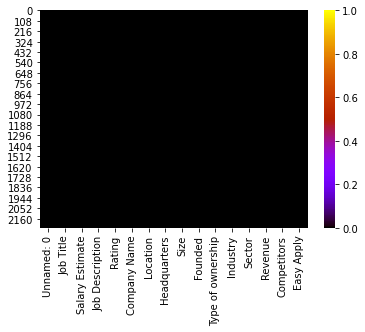

In [3]:
sns.heatmap(df.isnull(),cmap='gnuplot')

Great ! It looks like there aren't any or extremely negligible missing values in the dataframe. However, instead of a null value, the data maybe replaced by keywords such as 'NA' or 'null'. We shall check for those later in our data cleaning operation.

Let us confirm that there aren't any null values in the dataframe.

In [4]:
df.isna().any()

Unnamed: 0           False
Job Title            False
Salary Estimate      False
Job Description      False
Rating               False
Company Name          True
Location             False
Headquarters         False
Size                 False
Founded              False
Type of ownership    False
Industry             False
Sector               False
Revenue              False
Competitors          False
Easy Apply           False
dtype: bool

Oh wow ! There seems to be a few missing values in the company name column. However, since our data analysis wouldn't require much use of company name, hence we aren't bothered by it. However, let us check the number of missing values for curiosity sake.

In [5]:
df['Company Name'].isna().value_counts()

False    2252
True        1
Name: Company Name, dtype: int64

So, there is just one single company name which is missing. We can safely dismiss the presence of any missing values since we shall be dropping the Companu Name column anyway.

Next, we shall check the various data types that we will be dealing with. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
Unnamed: 0           2253 non-null int64
Job Title            2253 non-null object
Salary Estimate      2253 non-null object
Job Description      2253 non-null object
Rating               2253 non-null float64
Company Name         2252 non-null object
Location             2253 non-null object
Headquarters         2253 non-null object
Size                 2253 non-null object
Founded              2253 non-null int64
Type of ownership    2253 non-null object
Industry             2253 non-null object
Sector               2253 non-null object
Revenue              2253 non-null object
Competitors          2253 non-null object
Easy Apply           2253 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 281.8+ KB


Upon glancing at the above data types, we see that there is an issue with salary estimate. Here, since the estimate is given to us in a range figure, we need to split the lower and upper bounds of the salaries into the max salary and min salary column. 

Let us solve the salary range issue now.


But wait ! There is something weird about the data. One of the entries have -1 which is weird as it doesn't make sense. Let us assume that -1 actually refers to null value. We shall replace this data with the mode of the data.



In [7]:
df['Salary Estimate'].mode()[0]

'$41K-$78K (Glassdoor est.)'

In [8]:
df['Salary Estimate']=df['Salary Estimate'].replace('-1',df['Salary Estimate'].mode()[0])

Let us first remove the source of the salary listing i.e. Glassdoor.

**split(separator,max_splits)**

In [12]:
df['Salary Estimate'],_=df['Salary Estimate'].str.split('(',1).str

In [13]:
df['Salary Estimate']

0        $37K-$66K 
1        $37K-$66K 
2        $37K-$66K 
3        $37K-$66K 
4        $37K-$66K 
           ...     
2248    $78K-$104K 
2249    $78K-$104K 
2250    $78K-$104K 
2251    $78K-$104K 
2252    $78K-$104K 
Name: Salary Estimate, Length: 2253, dtype: object

In [14]:
df['Min_Salary'],df['Max_Salary']=df['Salary Estimate'].str.split('-').str

In [15]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Min_Salary,Max_Salary
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,$37K,$66K
1,1,Quality Data Analyst,$37K-$66K,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,$37K,$66K
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,$37K,$66K
3,3,Data Analyst,$37K-$66K,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,$37K,$66K
4,4,Reporting Data Analyst,$37K-$66K,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,$37K,$66K


As we can see, we have separated the salaries into Minimum salary and maximum salary. However, there is still some unncecessary info the columns which we need to clean. Let us try to do that using the split function. In addition, it is important to change the datatype of salary from string to int. Let us attempt to do that aswell. 

In [16]:
df['Min_Salary']=df['Min_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
df['Max_Salary']=df['Max_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

In [17]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Min_Salary,Max_Salary
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37,66
1,1,Quality Data Analyst,$37K-$66K,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37,66
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37,66
3,3,Data Analyst,$37K-$66K,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,37,66
4,4,Reporting Data Analyst,$37K-$66K,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37,66


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 18 columns):
Unnamed: 0           2253 non-null int64
Job Title            2253 non-null object
Salary Estimate      2253 non-null object
Job Description      2253 non-null object
Rating               2253 non-null float64
Company Name         2252 non-null object
Location             2253 non-null object
Headquarters         2253 non-null object
Size                 2253 non-null object
Founded              2253 non-null int64
Type of ownership    2253 non-null object
Industry             2253 non-null object
Sector               2253 non-null object
Revenue              2253 non-null object
Competitors          2253 non-null object
Easy Apply           2253 non-null object
Min_Salary           2253 non-null int64
Max_Salary           2253 non-null int64
dtypes: float64(1), int64(4), object(13)
memory usage: 317.0+ KB


As we can see, we have successfully cleaned the data for max salary and min salary in their integer forms. 